-----------------------
#### Implement the grid world problem
---------------

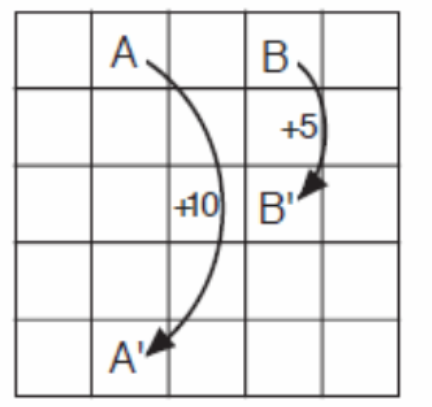

In [1]:
pip install tabulate

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np

#from tabulate import tabulate

import seaborn
import matplotlib.pyplot as plt

In [3]:
n_grid_rows = 5
n_grid_cols = 5

In [4]:
gamma        = 0.9

n_plots_rows = 4
n_plots_cols = 3

# number of times we will go through the whole grid
n_iters = 12

In [5]:
def compute_value_funcs(grid):
    
    fig, ax = plt.subplots(nrows=n_plots_rows, ncols=n_plots_cols, figsize=(18, 10))
    
    for num in range(n_iters): 
        for i in range(n_grid_rows):        # all the rows
            for j in range(n_grid_cols):    # all the columns
        
                # if going up takes us out of the grid then its value be 0
                up_grid = grid[i-1][j] if i > 0 else 0   
                
                # if going down takes us out of the grid then its value be 0
                down_grid = grid[i+1][j] if i < 4 else 0  
                
                # if going left takes us out of the grid then its value be 0
                left_grid = grid[i][j-1] if j > 0 else 0  
                
                # if going right takes us out of the grid then its value be 0
                right_grid = grid[i][j+1] if j < 4 else 0  

                all_dirs = [up_grid, down_grid, left_grid, right_grid]     

                value = 0  
                
                if   i==0 and j==1:                   # the position of A
                    value = 10 + gamma * grid[4][1]
                elif i==0 and j==3:                   # the position of B
                    value =  5 + gamma * grid[2][3]
                else:
                    for direc in all_dirs:
                        if direc != 0: 
                            value += .25 * ( 0 + gamma * direc)       # if we don't go out of the grid
                        else:
                            value += .25 * (-1 + gamma * grid[i][j])  # if we go out of the grid
            
                grid[i][j] = value

        seaborn.heatmap(    data        = np.round(grid, 2), 
                            ax          = ax[divmod(num, n_plots_cols)],
                            annot       = True, 
                            fmt         = ".3f",
                            annot_kws   = {"size":8},
                            yticklabels = False,
                            xticklabels = False,
                            cbar        = False,
                            # linecolor  ="#282828", 
                            # linewidths = 0.1,
                            # cmap       = "Oranges_r"
                    )

**initialize value funcs =0**

In [6]:
grid = np.zeros((n_grid_rows, n_grid_cols))
grid

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

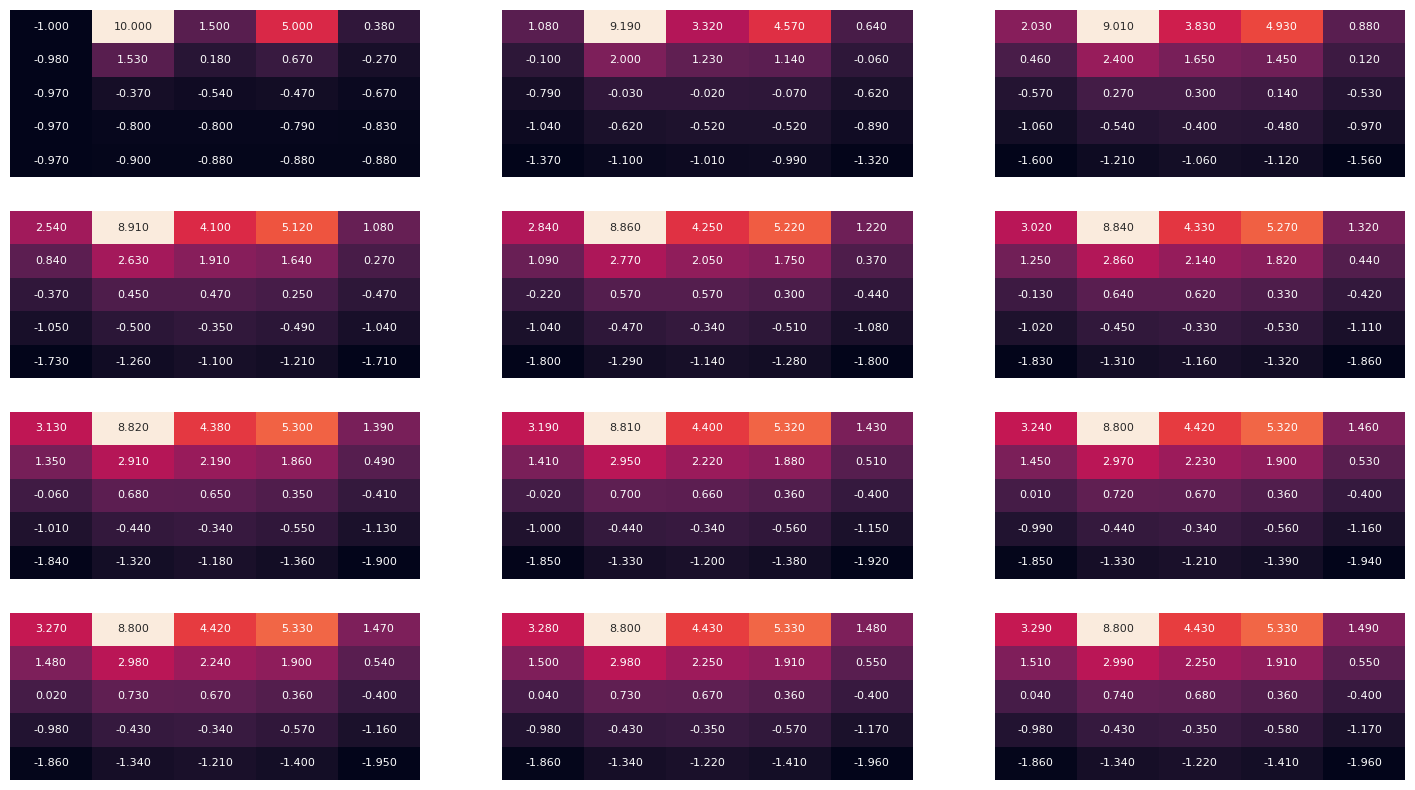

In [7]:
compute_value_funcs(grid)

#### show the policy (optimal action in each of the cell)

In [14]:
import seaborn as sns

In [15]:
def get_policy(V, board_rows, board_cols):
        all_dirs       = []
        all_dirs_chars = []

        for i in range(board_rows):
            for j in range(board_cols):

                neighbors_val = []

                if (i,j) in [WIN_STATE, LOSE_STATE]:
                    dir      = ' '
                    dir_char = ' '
                else:
                    #print(i, j, V[i,j], end='->')
                    # L, R, U, D
                    neighbors = [
                        (i, 0            if j-1 <= board_cols else j-1), 
                        (i, board_cols-1 if j+1 >= board_cols else j+1), 
                        (i  if i-1 < 0 else i-1, j), 
                        (board_rows-1 if i+1 >= board_rows else i+1, j)
                        ]

                    #print(neighbors)
                    
                    for each in neighbors:
                        neighbors_val.append(V[each])

                    max_idx = np.argmax(neighbors_val)

                    if max_idx ==0:         # L
                        dir = u'\u2190'
                        dir_char = 'L'
                    elif max_idx ==1:       # R
                        dir = '\u2192'
                        dir_char = 'R'
                    elif max_idx ==2:       # U
                        dir = u'\u2191'
                        dir_char = 'U'
                    else:
                        dir = u'\u2193'     # D
                        dir_char = 'D'
                    
                all_dirs.append(dir)
                all_dirs_chars.append(dir_char)

        all_state_dirs = np.array(all_dirs).reshape(board_rows, board_cols)

        # combining text with values
        formatted_text = (np.asarray(["{0}\n{1:.6f}".format(text, data) for text, data in zip(all_state_dirs.flatten(), V.flatten())])).reshape(board_rows, board_cols)

        return formatted_text, all_dirs_chars

In [16]:
WIN_STATE, LOSE_STATE = None, None

In [17]:
BOARD_ROWS = 5
BOARD_COLS = 5

In [18]:
grid  = np.zeros((BOARD_ROWS, BOARD_COLS))
gamma = .6                                      # discount value

A_row = 0
A_col = 1

B_row = 0
B_col = 3

A_dest_row = 4
A_dest_col = 1

B_dest_row = 2
B_dest_col = 3

In [19]:
number_plots_per_row    = 3
nbr_cycles_of_run       = 9

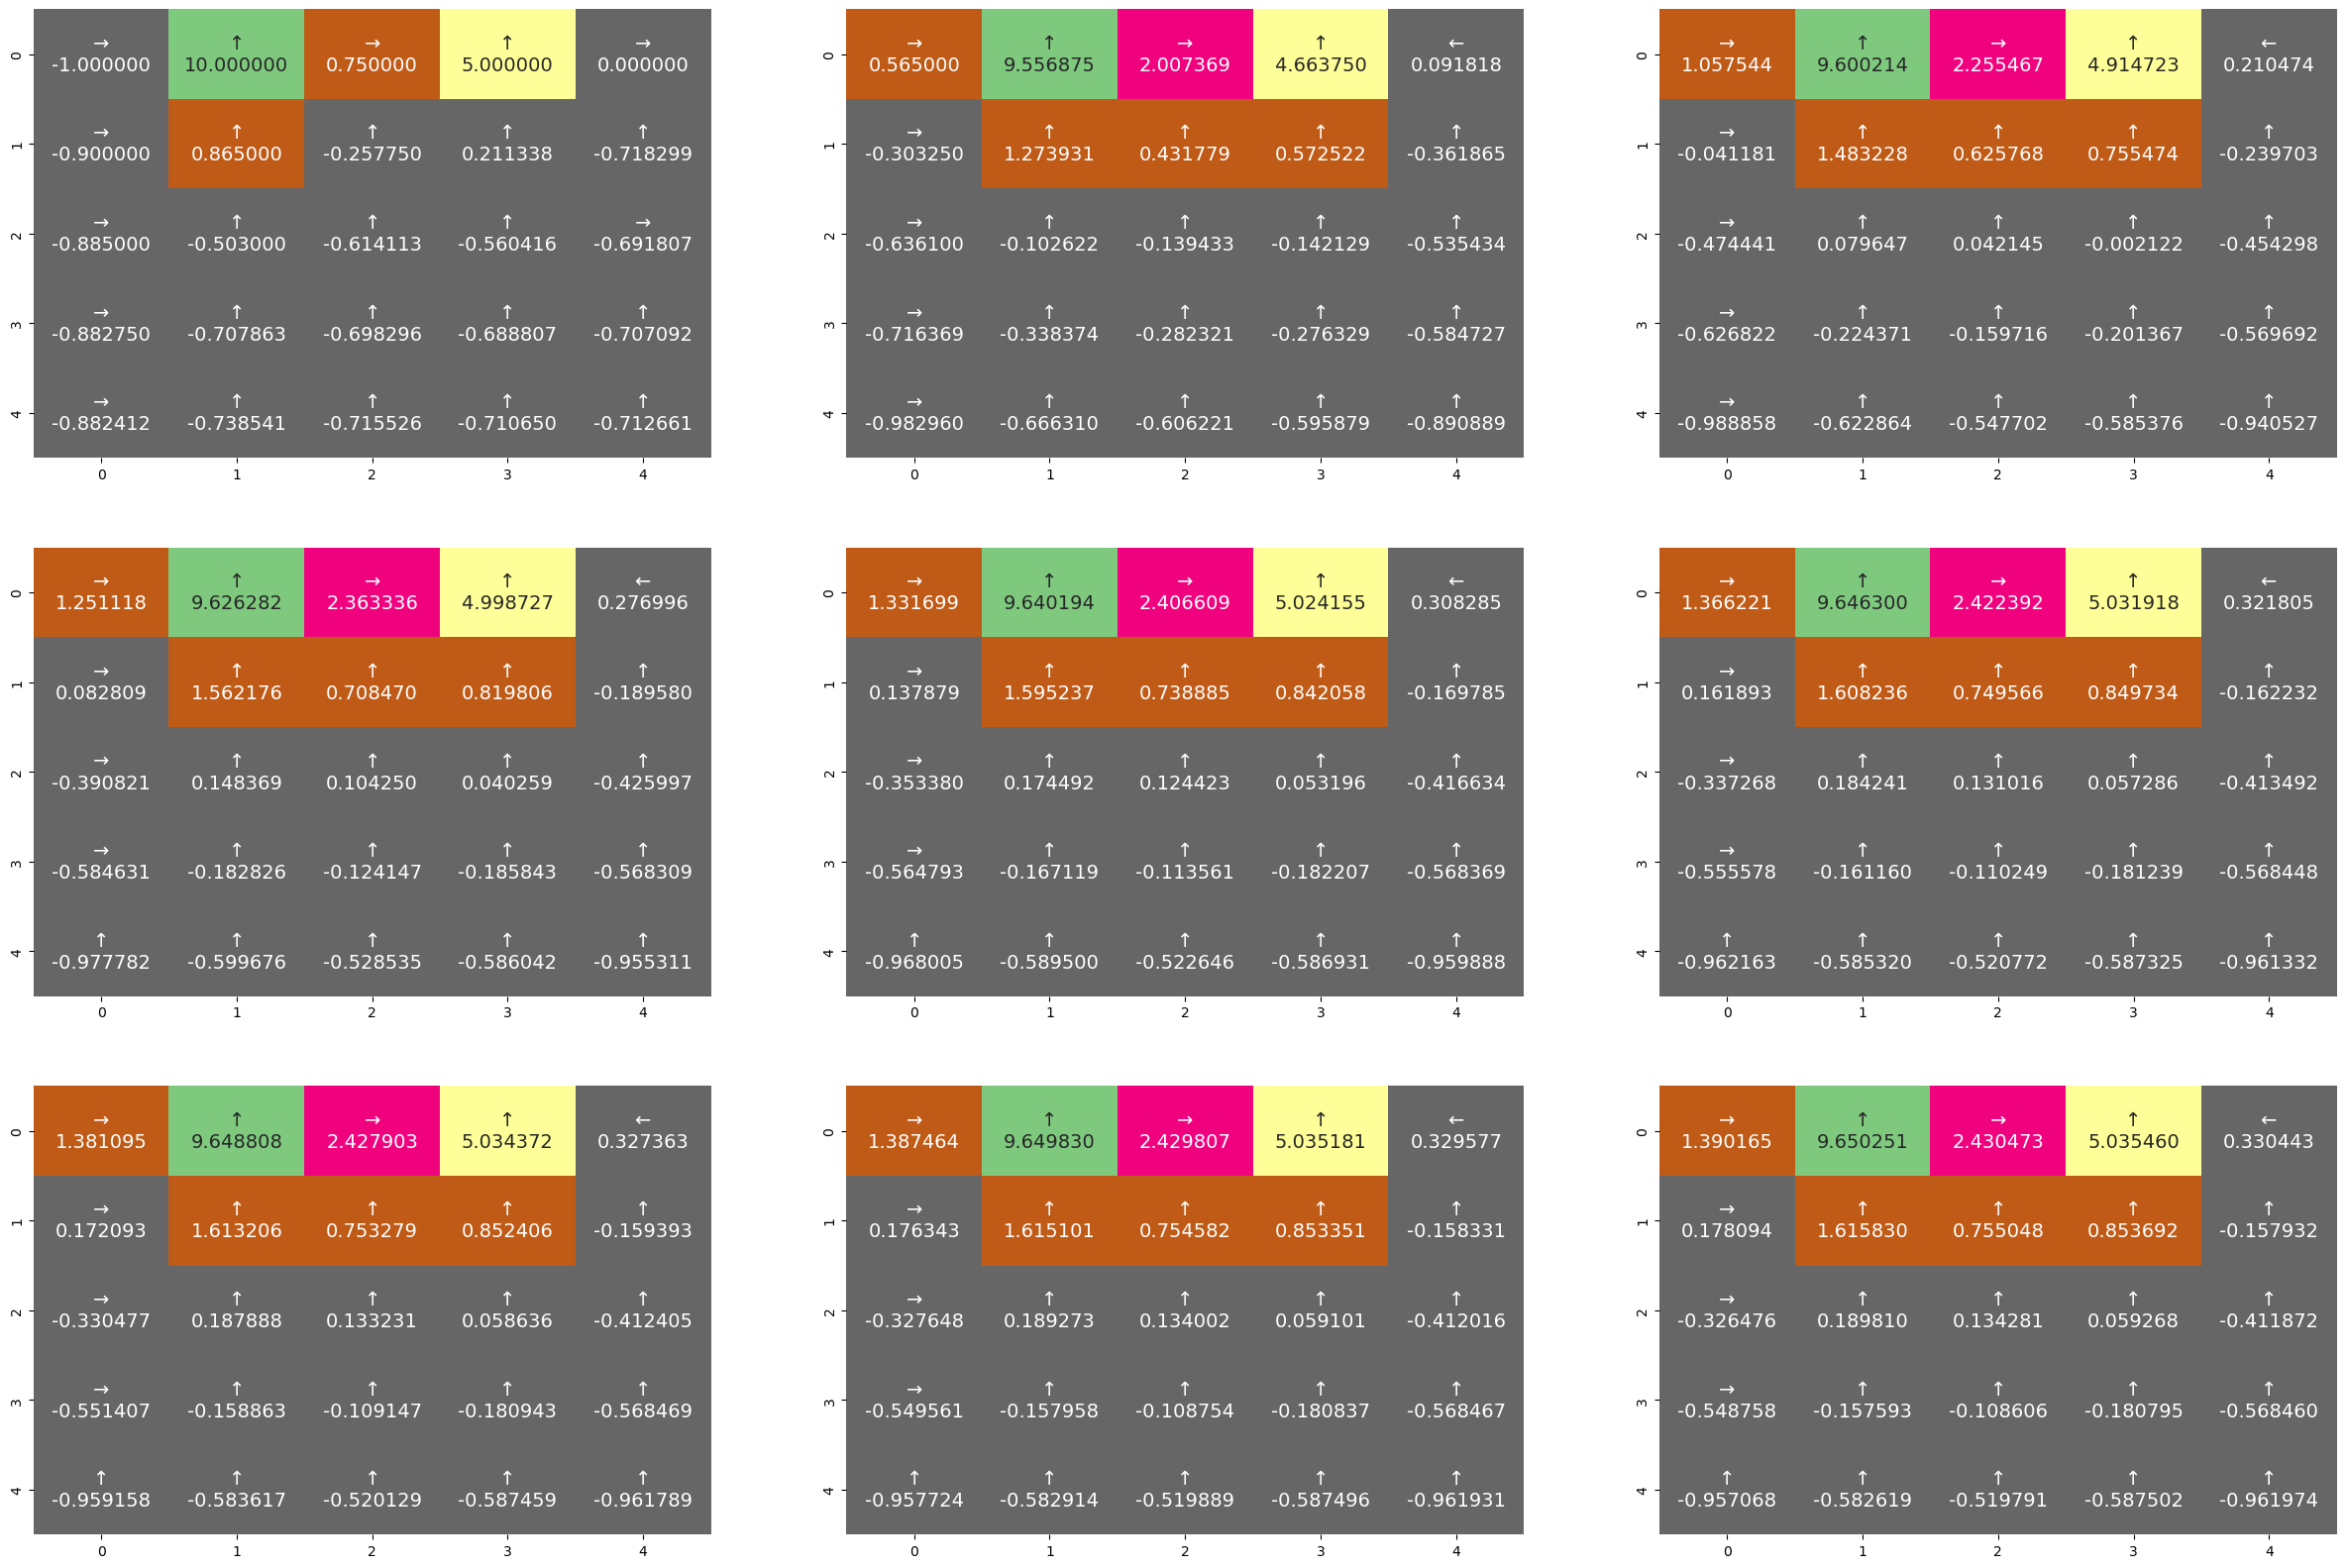

In [20]:
fig, ax = plt.subplots(nrows   = nbr_cycles_of_run//number_plots_per_row, 
                       ncols   = number_plots_per_row, 
                       figsize = (30, 20))

for num in range(nbr_cycles_of_run ):  # number of times we will go through the whole grid
    
    for i in range(BOARD_ROWS):        # all the rows
        for j in range(BOARD_COLS):    # all the columns

            # if going up takes us out of the grid then its value be 0
            up_grid    = grid[i-1][j] if i > 0 else 0  
            
            # if going down takes us out of the grid then its value be 0
            down_grid  = grid[i+1][j] if i < BOARD_ROWS-1 else 0 
            
            # if going left takes us out of the grid then its value be 0
            left_grid  = grid[i][j-1] if j > 0 else 0  
            
            #if going right takes us out of the grid then its value be 0
            right_grid = grid[i][j+1] if j < BOARD_COLS-1 else 0  

            all_dirs = [up_grid, down_grid, left_grid, right_grid]     

            value=0  
            
            if i==A_row and j==A_col:   # the position of A
                value = 10 + gamma * grid[A_dest_row][A_dest_col]
            elif i==0 and j==3:         # the position of B
                value = 5  + gamma * grid[B_dest_row][B_dest_col]
            else:
                for direc in all_dirs:
                    if direc != 0: 
                        value += .25 * (0 +  gamma * direc)      # if we don't go out of the grid
                    else:
                        value += .25 * (-1 + gamma * grid[i][j]) # if we go out of the grid

            grid[i][j] = value
            
    V = np.round(grid, 6)         
    policy, all_dirs_chars = get_policy(V, BOARD_ROWS, BOARD_COLS) 
    
    sns.heatmap(V, 
            annot = policy, 
            fmt   = '', 
            cbar  = False,
            #square= True, 
            cmap  = 'Accent_r',
            annot_kws = {"size":14},
            ax        = ax[num//number_plots_per_row, num%number_plots_per_row]
            );